# Fourier Analysis Lab
All  of  the  programming  assignments  are  to  be  done  in  Python  using  additional  libraries  specified  in  the  assignments.  There  are many  libraries  available,  some  of  which  we  will  be  using,  and  you  are  welcome  to  use  them  with  one  exception:  if  the  library  or  a  function  within  it  performs  the  specific  function  you  are  asked  to  code,  you  may  not  use  that  other  than  perhaps  as  a  reference  to  compare  against. All  of  the  code  you  submit  must  be  your  own. You are welcome to turn in a completed jupyter notebook.

## The Basics

We have discussed the Fourier Transform in great detail in class. In this lab, we will implement many of the practical applications of the Fourier Transform. In order to do this, we need to know how the Fourier Transform is implemented in the Numpy library.

The following code can be used to perform the Fourier Transform and Inverse Fourier Transform.

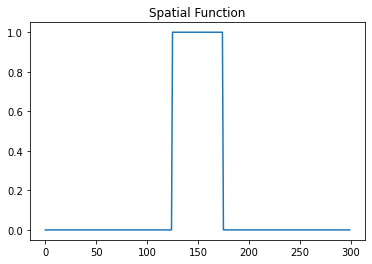

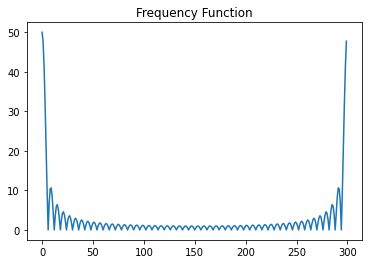

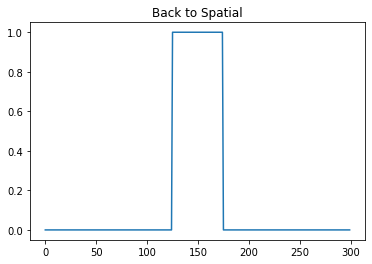

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Initialize Data
data = np.zeros(300)
data[125:175] = 1
plt.plot(data);plt.title("Spatial Function");plt.show()

#Peform Fourier Transform
fourier = np.fft.fft(data)
#Plot the complex magnitude of the fourier transform
plt.plot(np.absolute(fourier));plt.title("Frequency Function");plt.show()

#Perform Inverse Fourier Transform
original = np.fft.ifft(fourier)
original = np.real(original)
plt.plot(original);plt.title("Back to Spatial");plt.show()

This is a very simple way to access and manipulate the fourier transform. Note that the frequency function defaults to the non centralized version for calculation. For visualization, you may choose to plot a centralized frequency function.

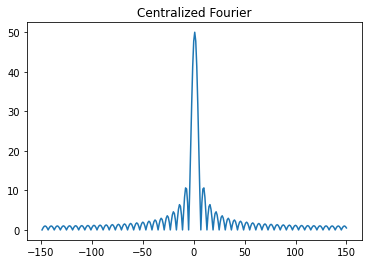

In [3]:
#Centralize the plot
N = len(fourier)
xvals = range(int(-N/2+1),int(N/2+1))

#Take the second half of the data, reverse and append it to the front
result = np.fft.fftshift(fourier)

plt.plot(xvals,np.absolute(result));plt.title("Centralized Fourier");plt.show()

You can also easily perform the fourier transform on a two dimensional set of data as well. This will be very helpful for doing transforms on our images.

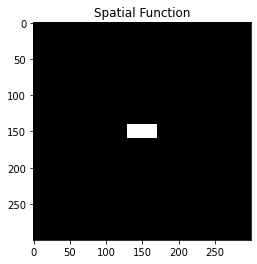

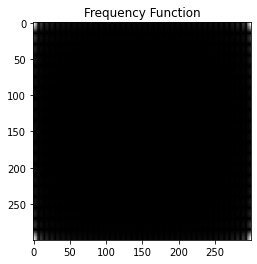

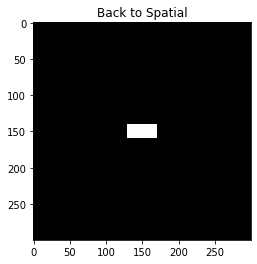

In [4]:
#Initialize Data
data2 = np.zeros((300,300))
data2[140:160,130:170] = 1
plt.imshow(data2,cmap="gray",interpolation="none");plt.title("Spatial Function");plt.show()

#Peform Fourier Transform
fourier2 = np.fft.fft2(data2)
fourier2 = fourier2
#Plot the complex magnitude of the fourier transform
plt.imshow(np.absolute(fourier2),cmap="gray",interpolation="none");plt.title("Frequency Function");plt.show()

#Perform Inverse Fourier Transform
original2 = np.fft.ifft2(fourier2)
original2 = np.absolute(original2)
plt.imshow(original2,cmap="gray",interpolation="none");plt.title("Back to Spatial");plt.show()

Again, you may also choose to centralize the fourier transform in 2D.

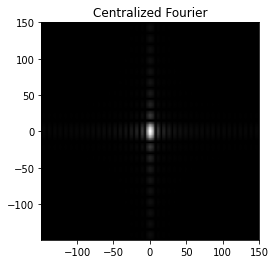

In [5]:
#Centralize the plot
M,N = np.shape(fourier2)
xvals = range(int(-N/2+1),int(N/2+1))
yvals = range(int(-M/2+1),int(M/2+1))

result2 = np.fft.fftshift(fourier2)

plt.imshow(np.absolute(result2),cmap="gray",interpolation="none",extent=[xvals[0],xvals[-1],yvals[0],yvals[-1]])
plt.title("Centralized Fourier");plt.show()

It will also be useful to be able to filter frequencies in the frequency domain. To help you with the basic structure of filtering programs, an example of the filtering pipeline is shown below.

In [6]:
# Setup Signal
data = np.zeros(300)
data[125:175] = 1

f = data

# Forward FFT
# Do the forward FFT 
F = np.fft.fft(f)

# Now create your transfer function H in the frequncy domain
H = np.zeros( F.shape, dtype=np.float32 )



#H = <<< Fill in your filter here >>>

#If your filter doesn't start at zero, shift if appropriately
H = np.fft.fftshift(H)



# Do frequency space filtering here...
G = np.zeros( F.shape, dtype='complex' )
G = F * H # for example given a transfer function H

# Inverse FFT
# Convert back to spatial domain
g = np.fft.ifft( G )

#Take only the real values
g = np.real(g)


Now that you have the basics down, you can start manipulating the data in useful ways.

To get full credit for this lab. Complete each of the tasks below.

## Task 1: 1-D Filtering

Design a 1-D low-pass filter to smooth a signal. For this task, filter the data from Signal.txt using a low pass filter of your design. It may be helpful to reference the example script shown above.

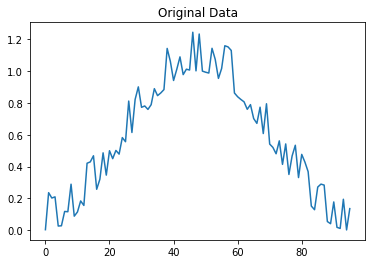

In [7]:
import matplotlib.pyplot as plt

data = np.loadtxt("Signal.txt")

plt.plot(data);plt.title("Original Data");plt.show()

The following code defining a 1D Gaussian may be helfpul:

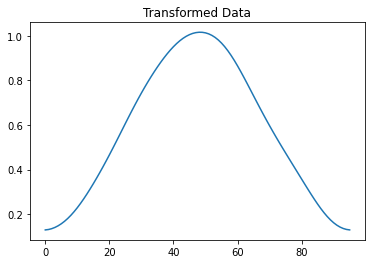

In [8]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# Forward FFT
# Do the forward FFT 
F = np.fft.fft(data)
# Now create your transfer function H in the frequncy domain
H = np.zeros( F.shape, dtype=np.float32 )
H = gaussian(np.linspace(-1,1,96),0,0.05)
#If your filter doesn't start at zero, shift if appropriately
H = np.fft.fftshift(H)
# Do frequency space filtering here...
G = np.zeros( F.shape, dtype='complex' )
G = F * H
# Inverse FFT
# Convert back to spatial domain
g = np.fft.ifft( G )

#Take only the real values
g = np.real(g)

plt.plot(g);plt.title("Transformed Data");plt.show()

Hint: Use np.linspace to define your x values from -1 to 1. Then you can adjust the mean and standard deviation parameters as needed.

## Task 2: Filtering Sound

You are given a noisy sound file called **NoisyAudio.wav**. Using a filter similar to the one you made in Task 1, remove as much noise as possible from the audio clip. You will not be able to remove all the noise (just like with real data), so pick parameters of the filter that you feel work best. You may also scale your result to make the final audio a little bit louder (*But beware of clipping!!!*).

Reminder: If sounddevice doesn't import, simply call *pip install sounddevice*

Note: Mac users may need to install some additional packages to get sound device working. Try the following commands if needed:

*brew install portaudio*

*pip install pyaudio*

In [9]:
import time
from scipy.io import wavfile
import sounddevice as sd

#######################
#######################
# Don't do this section
#######################
#######################

#Import data and convert to Mono channel audio
fs, data = wavfile.read("NoisyAudio.wav")
data = data[:,0]

#Play the audio
sd.play(data, fs)

#Use this during testing so you don't have to 
#listen to the full sound file
time.sleep(7)
sd.stop()

ModuleNotFoundError: ignored

## Task 3: 2D Blurring and Sharpening

In previous labs, we have performed blurring and sharpening of 2D images. We did this by using specific kernels with this image. These processes can also be done more continuously using a filters in the frequency domain.

For a 2D image, a blurring effect can be implemented by applying a low-pass filter to the image in the frequency domain. In similar fashion, a sharpening effect can be implemented by applying a high-boost filter to the image in the frequency domain.

**Implement a blurring and sharpening effect using the frequency domain on the example grayscale image.** 

Again, to help you with the basic structure of filtering programs, reference the example script in **The Basics** section, but use the 2D numpy functions (np.fft.fft2 and np.fft.ifft2).

Lastly, make sure to clip out negative values from your result image.

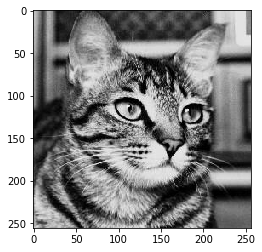

In [10]:
import matplotlib.pyplot as plt

filename = "example.jpg"
im = plt.imread(filename)

plt.imshow(im, cmap='gray', interpolation='none')
plt.show()

The following code for making a 2D Gaussian may be helpful.

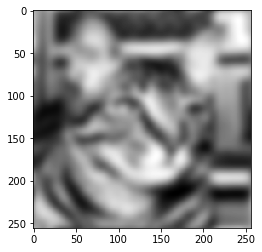

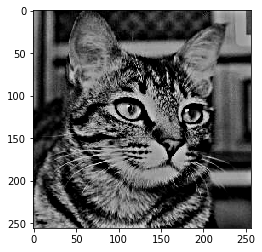

In [11]:
catdata = np.array(im)
F2 = np.fft.fft2( catdata )
F2 = F2

X,Y=np.meshgrid(np.linspace(-16,16,256),np.linspace(-16,16,256));
mu,sigma=0,1;

H2blur=np.exp(-((X-mu)**2+(Y-mu)**2)/(2.0*sigma**2))
H2blur=np.fft.fftshift( H2blur )
H2boost = 1+(1-H2blur)

G2blur = np.zeros( F2.shape, dtype='complex' )
G2boost = np.zeros( F2.shape, dtype='complex' )
G2blur = F2 * H2blur
G2boost = F2 * H2boost
g2blur = np.fft.ifft2( G2blur )
g2blur = np.real( g2blur )
g2boost = np.fft.ifft2( G2boost )
g2boost = np.real(g2boost)

#Clip negative values
g2blur = np.clip(a=g2blur,a_min=0,a_max=None)
g2boost = np.clip(a=g2boost,a_min=0,a_max=None)

# plt.imshow(H2blur, cmap='gray', interpolation='none', extent = (-10, 10, 10, -10))
# plt.show()
# plt.imshow(H2boost, cmap='gray', interpolation='none', extent = (-10, 10, 10, -10))
# plt.show()

plt.imshow(g2blur, cmap='gray', interpolation='none')
plt.show()
plt.imshow(g2boost, cmap='gray', interpolation='none')
plt.show()


Task 4: Interference Pattern

The image **interfere.png** has an interference pattern of unknown spatial frequency, orientation and magnitude (it is, however, a single frequency).  

**Option 1** (for 60% credit): Put the image into the frequency domain and manually determine which frequency is causing the interference. Eliminate that frequency noise and then place the image back into the spatial domain to get a smooth image.

Hints:
- The frequency you’re looking for isn’t necessarily the one with the greatest magnitude, it’s the one that is most “out of place”.
- To spot the "out of place frequency", you will want to zero out the mean value of the function (the frequency at (0,0) ), which is much larger than any other value in the frequency domain. Once you zero that out, it should be clear to see where the outlier frequency is located (Use *%matplotlib notebook* and zoom in to get the pixel value).
- Don’t just zero the frequency – having that frequency missing can be just as bad as having too much of it.  Try to estimate a reasonable magnitude using similar frequencies.
- Remember that you’ll have to eliminate both that frequency and its inverse frequency. 


**Option 2** (for 100% credit): Write a program that automatically finds and eliminates the noisy frequency. This can be done by writing a convolution kernel that specifically looks for anamolies in the data. The setup of the code might look something like this:

1. Place the image into the frequency domain.
2. Write a special 3x3 kernel that makes any frequency that is much higher than it's neighbors positive and everything else negative (What would that look like?).
3. Use your general convolution code from the image processing lab to convolve over the absolute values of the frequency domain.
4. For every positive value in the result, make the corresponding frequency equal to the average or median of the neighboring frequencies.
5. Place the image back into the spatial domain.

Make sure that you do this automatically. Your program should work for any single-frequency interference in this fashion.


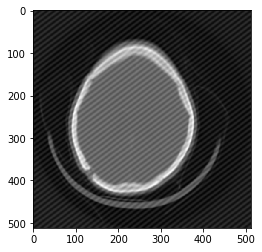

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


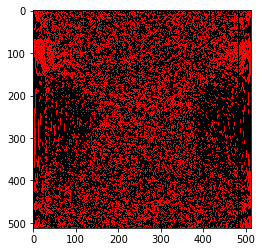

In [15]:
import matplotlib.pyplot as plt

def convolution(image,kernel): # This is a spatial filter
  result = np.zeros(image.shape, dtype='complex')
  #print("ConvoResultShape: ",result.shape)
  size = kernel.shape[0]
  borderwidthfloat = size/2
  borderwidth = int(borderwidthfloat)
  imgheight, imgwidth, _ = image.shape
  for current_x in range(borderwidth,imgwidth-borderwidth):
    for current_y in range(borderwidth,imgheight-borderwidth):
      window = image[(current_y-borderwidth):(current_y+borderwidth+1),(current_x-borderwidth):(current_x+borderwidth+1)]
      dif = np.sum(np.multiply(window,kernel))
      if dif > 0:
        result[current_y,current_x] = image[current_y,current_x]
      else:
        result[current_y,current_x] = -image[current_y,current_x]

  return result

def medianFilter(image,size=3):
  result = np.zeros(image.shape, dtype='complex')
  #print("MedianResultShape: ",result.shape)
  imgheight, imgwidth, _ = image.shape
  borderwidthfloat = size/2
  borderwidth = int(borderwidthfloat)
  for current_x in range(borderwidth,imgwidth-borderwidth):
    for current_y in range(borderwidth,imgheight-borderwidth):
      #If current frequency, ignore the current frequency, set current frequency to median of neighbors only
      if image[current_y,current_x].all() > 0:
        window = np.array([ image[current_y-borderwidth,current_x-borderwidth,:], image[current_y,current_x-borderwidth,:], 
                            image[current_y+borderwidth,current_x-borderwidth,:],
                            image[current_y-borderwidth,current_x,:], image[current_y+borderwidth,current_x,:],
                            image[current_y-borderwidth,current_x+borderwidth,:], image[current_y,current_x+borderwidth,:], 
                            image[current_y+borderwidth,current_x+borderwidth,:] ])
        #print("WindowShape: ",window.shape)
        result[current_y,current_x] = np.median(window)
      #Else, copy over frequency from image to result
      else:
         result[current_y,current_x] = image[current_y,current_x]
  
  return result

filename = "interfere.png"
im = plt.imread(filename)

plt.imshow(im, cmap='gray', interpolation='none')
plt.show()

data3=np.array( im )
F3=np.fft.fft2( data3 )

kernel = np.array([[-1, -1, -1],
                    [-1, 1, -1],
                    [-1, -1, -1]])
G3=convolution(F3,kernel)
G3=medianFilter(G3)

g3 = np.fft.ifft2( G3 )
g3 = np.real( G3 )

plt.imshow(g3 * 255, cmap='gray', interpolation='none')
plt.show()